<a href="https://datamics.com/de/courses/"><img src=../../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Natural Language Processing mit Python

Dieses Notebook gehört zur Lektion über NLP (Natural Language Processing) mit Python.

In dieser Lektion werden wir auf einer allgemeinen Ebene über die Funktionsweise von NLP sprechen. Das bedeutet praktisch die Kombination von Machine Learning Techniken und Text. Der Text muss durch mathematische und statistische Methoden so bearbeitet werden, dass unser Machine Learning Algorithmus damit arbeiten kann!

Sobald wir diese Lektion abgeschlossen haben widmen wir uns einem Projekt mit Daten der Plattform Yelp.

**Voraussetzung:** Zum Durchführen von NLP benötigen wir `NLTK`. Dieses müssen wir zunächst installieren. Mit Anaconda könnt ihr den nachfolgenden Code ausführen und/oder euch auf die Video Lektion beziehen.

In [61]:
# Nur ausführen wenn du NLTK installieren musst und Anaconda verwendest

# Kommentiere die folgenden Zeilen aus (# entfernen) 
# und führe sie aus!

# !conda install nltk
# import nltk
# nltk.download()

## Daten laden

Wir werden einen Datensatz von den [UCI Datensätzen](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) verwenden. Dieser Datensatz ist aber auch schon in den Kursunterlagen enthalten. Genauer gesagt im Ordner, in dem auch dieses Notebook liegt.

Die Daten die wir nutzen beinhalten mehr als 5 Tausend SMS Handynachrichten. In der **readme** Datei erfahrt ihr weitere Einzelheiten.

Lasst uns beginnen und `rstrip()` in Verbindung mit einer Listen Abstraktion verwenden. So können wir alle Zeilen der Nachrichten erhakten:

In [62]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


Eine Sammlung an Text wird auch *Corpus* genannt. Lasst uns die ersten 10 Nachrichten ausgeben und sie mit `enumerate` nummerieren:

In [63]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

Anhand des Abstands können wir erkennen, dass es sich hier um eine *TSV* ("tab separated values*) Datei handelt. Die erste Spalte verrät uns, ob es sich um eine normale ("ham") oder "spam" handelt. Die Zweite Spalte ist die Nachricht selbst. 

*Denkt daran, dass die Zahlen selbst kein Teil der Daten sind. Wir haben sie manuell zur Ausgabe hinzugefügt.*

Indem wir diese ham/spam Unterscheidung nutzen können wir einen Machine Learning Algorithmus trainieren den Unterschied zu erkennen und neue Nachrichten automatisch einzuordnen. 

Anstatt jetzt die TSV manuell mit Python zu parsen können wir uns die Fähigkeiten von **Pandas** zu nutze machen:

In [64]:
import pandas as pd

Wir werden `read_csv` verwenden und dann das `sep` Argument spezifizieren. Außerdem können wir die gewünschten Spaltennamen festlegen.

In [65]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Explorative Datenanalyse

Untersuchen wir unsere Daten ein bisschen: einige statistische Auswertungen anschauen und ein paar Visualisierungen!

In [66]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Wir können `groupby` verwenden, um nach dem Label (ham/spam) zu unterscheiden. Bereits jetzt können wir über die Eigenschaften nachdenken, die beides unterscheiden.

In [67]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Wenn wir mit unserer Analyse fortfahren wollen wir über die Eigenschaften nachdenken, die wir zur Differenzierung verwenden werden. Das Konzept dahinter gehört zum "[Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)". Je besser das Fachwissen über die Daten ist, desto besser wirst du Eigenschaften identifizieren und hearusarbeiten können. Feature Engineering ist im Allgemeinen ein goßer Teil der Spam Erkennung. Ich empfehle euch, etwas über das Thema zu lesen.

Wir können eine neue Spalte anlegen, die die Länge der Nachricht beinhaltet:

In [68]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Daten Visualisierung

Visualisiern wir unsere neu gewonnene Eigenschaft!

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

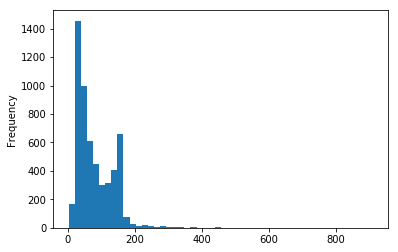

In [70]:
messages['length'].plot(bins=50, kind='hist') 

Ihr könnt auch mit der `bin size` herumspielen, um die Daten besser zu verstehen. Was wir aber gleich sehen ist, dass die Textlänge eine gute Eigenschaft zur Unterscheidung sein könnte. Versuchen wir das noch genauer zu überprüfen: Die x-Achse geht bis 1000, woran liegt das? Es muss einige sehr lange Nachrichten geben...

In [71]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Wow, die längste Nachricht hat 910 Zeichen. Schauen wir sie uns an:

In [72]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Da hat wohl eine Art Romeo die Nachricht verschickt! Aber lassen wir es gut sein. Eigentlich wollen wir ja herausfinden, ob die Textlänge eine gute Differenzierungsgrundlage ist, um ham von spam zu unterscheiden:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000289E5AD6128>,
      dtype=object)

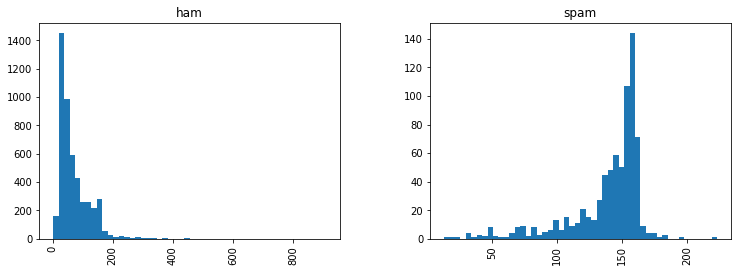

In [73]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

Sehr interessant! Nur durch die EDA konnten wir einen Trend erkennen: Es gibt weniger Spam Nachrichten (juhu!) und diese scheinen mehr Zeichen zu enthalten (Sorry Romeo!).

Jetzt können wir damit fortfahren unsere Daten darauf vorzubereiten mit SciKit Learn verarbeitet zu werden!

## Text Pre-Processing

Unser größtes Problem ist, dass unsere Daten komplett im Text-Format (Strings) vorliegen. Die Klassifizierungsalgorithmen die wir bisher können benötigen eine Form von numerischer Information, um die Klassifikation durchzuführen. Es gibt viele Methoden um den *Corpus* in Vektor-Format zu bringen. Die einfachste ist die "[bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model)" Methode. Dabei wird jedes einzigartige (unique) Wort in einem Text durch eine Zahl repräsentiert wird. 

In diesem Teil werden wir die "rohen" (en. raw) Nachrichten (Sequenz aus Zeichen) in Vektoren (Sequenz aus Zahlen) umwandeln.

Als ersten Schritt trennen wir die Nachrichten in ihre einzelnen Wörter trennen und eine Liste zurückgeben. Wir werden außerdem sehr häufige Wörter ("the", "a", etc.) entfernen. Um dies zu tun nutzen wir die `NLTK` Library. Es ist gewissermaßen die Standardlibrary um mit Python Text zu verarbeiten und bietet viele nützliche Features. Wir brauchen jetzt nur einige der grundlegenden.

Lasst uns eine Funktion erstellen, die den Text der "Message"-Spalte verarbeitet. Dann können wir diese mit `apply()` auf den DataFrame anwenden.

Zuerst entfernen wir die Zeichensetzung. Wir können dazu von Python's eingebauter `string` Library Gebrauch machen.

In [74]:
import string

mess = 'Einfache Nachricht! Achtung: sie beinhaltet Zeichensetzung.'
messEN = 'Sample message! Notice: it has punctuation.'

# Wir überprüfen einzelne Zeichen, ob sie zur Zeichensetzung gehören
nopunc = [char for char in mess if char not in string.punctuation]
nopuncEN = [char for char in messEN if char not in string.punctuation]

# Die Zeichen wieder zusammenfügen
nopunc = ''.join(nopunc)
nopuncEN = ''.join(nopuncEN)

print(nopunc)

Einfache Nachricht Achtung sie beinhaltet Zeichensetzung


Als nächstes können wir uns anschauen, wie wir Stoppwörter entfernen können. Unsere Nachrichten sind Englisch, weshalb wir die Liste der englischen Stoppwörter aus NLTK verwenden. Es gibt auch Listen für andere Sprachen.

*Info: Stoppwörter sind sehr häufig auftauchenden Wörter einer Sprache, die gleichzeitig nicht wichtig für den wesentlichen Gehalt eines Texts sind.*

In [75]:
#from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('english')[0:10] # Einige Stoppwörter anzeigen

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\-T-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [76]:
nopuncEN.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

Jetzt entfernen wir die Stoppwörter:

In [77]:
clean_messEN = [word for word in nopuncEN.split() if word.lower() not in stopwords.words('english')]

In [78]:
clean_messEN

['Sample', 'message', 'Notice', 'punctuation']

Diese beiden Schritte können wir jetzt in eine Funktion packen, die wir dann auf unseren DataFrame anwenden können.

In [79]:
def text_process(mess):
    """
    Nimmt einen String von Text und führt das folgende durch:
    1. Entferne alle Zeichensetzung
    2. Entferne alle Stoppwörter
    3. Gebe eine Liste des gesäuberten Texts zurück
    """
    # 1.
    nopunc = [char for char in mess if char not in string.punctuation]

    # 2.
    nopunc = ''.join(nopunc)
    
    # 3.
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Hier noch einmal der original DataFrame:

In [80]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Jetzt können wir diese Nachrichten "tokenizen". *Tokenization* bezeichnet den Prozess der Kovertierung eines normalen Text Strings in eine Liste von Token (Wörter die wir tatsächlich verarbeiten wollen).

Schauen wir uns dazu ein Beispiel an.

*Hinweis: Für einige Nachrichten könnten wir Warnungen oder Fehler erhalten. Das passiert für Zeichen, die wir bisher nicht beachtet haben. Z.B. solche, die nicht in Unicode enthalten sind (wie das Zeichen für den Britischen Pfund).*

In [81]:
# Überprüfung
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [82]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Fortsetzung Normalisierung

Es gibt viele Wege um mit der Normalisierung des Texts fortzufahren. Dazu gehören das "[Stemming](https://de.wikipedia.org/wiki/Stemming)" oder Trennung nach dem "[Part of Speech](http://www.nltk.org/book/ch05.html)".

NLTK bietet viele eingebaute Tools und eine tolle Dokumentation zu vielen dieser Methoden. Manchmal funktionieren sie nicht so gut für Textnachrichten, in denen die Autoren viele Abkürzungen und Umgangssprache verwenden. Ein Beispiel:

    'Nah dawg, IDK! Wut time u headin to da club?'
    
im Vergleich zu

    'No dog, I don't know! What time are you heading to the club?'
    
Einige Text Normalisierungs Methoden werden mit dieser (ersten) Art von Text Probleme haben. Für fortgeschrittenere Methoden ermutige ich euch das [online NLTK Buch](http://www.nltk.org/book/) anzuschauen.

Für den Moment (und diese Lektion) werden wir verwenden was wir haben, um unsere Liste an Wörtern in einen tatsächlichen Vektor für SciKit Learn umzuwandeln.

### Vektorisierung

Aktuell liegen uns die Nachrichten als eine Listen von Tokens (auch als "Lemmas" bekannt) vor. Wir müssen jetzt jede dieser Nachrichten in einen Vektor umwandeln, mit dem SciKit Learn's Algorithmus arbeiten kann.

Wir werden dazu die folgenden drei Schritte nach dem *bag-of-words* (bow) Modell durchführen:

1. Zähle wie häufig ein Wort in jeder Nachricht vorkommt (Term Frequency)
2. Gewichte die Anzahl, so dass häufige Wörter ein niedrigeres Gewicht erhalten (Inverse Document Frequency)
3. Normalisiere den Vektor in Einheitslänge, um von der Länge des Originaltexts zu abstrahieren

Beginnen wir die ersten Schritte:

Jeder Vekotr wird so viele Dimensionen haben, wie es unique Wörter in der SMS gibt. Wir werden zuerst SciKit Learn's `CountVectorizer` verwenden. Dieses Modell konvertiert eine Sammlung an Text in eine Matrix von Token Anzahlen.

Wir können uns das als 2-Dimensionale Matrix vorstellen. Die eine Dimension ist das komplette Vokabular aller Nachrichten (1 Wort pro Zeile). Die zweite Dimension sind die aktuellen Dokumente (1 Nachricht pro Spalte).

Zum Beispiel:

<table border = “1“>
<tr>
<th></th> <th>Nachricht 1</th> <th>Nachricht 2</th> <th>...</th> <th>Nachricht N</th> 
</tr>
<tr>
<td><b>Wort 1 Anzahl</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Wort 2 Anzahl</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Wort N Anzahl</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

Da es so viele Nachrichten gibt können wir häufig die Anzahl 0 erwarten. Deshalb wird SciKit Learn eine [*Sparse Matrix*](https://de.wikipedia.org/wiki/D%C3%BCnnbesetzte_Matrix) ausgeben.

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

Es gibt viele Argumente, die sich an den CountCevtorizer übergeben lassen. In diesem Fall werden wir den `analyzer` spezifizieren. Er soll unserer zuvor definierten Funktion entsprechen:

In [84]:
# Kann etwas dauern...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Gebe die Anzahl an Wörtern im Vokabular aus
print(len(bow_transformer.vocabulary_))

11425


Lasst uns eine Nachricht nehmen und die Anzahl für ihren *bag-of-words* als Vektor ausgeben. Dazu können wir unseren neuen `bow_transformer` nutzen:

In [85]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


Jetzt schauen wir uns die Werte im Vektor an:

In [86]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


Das bedeutet, dass es insgesamt 7 unique Wörter in Nachricht 4 gibt (nachdem wir die Stoppwörter entfernt haben). Zwei davon tauchen 2 mal auf, der Rest nur einmal. Gehen wir weiter und schauen, welche davon zwei Mal auftauchen:

In [87]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

UIN
schedule


Jetzt können wir `.transform` auf unser *bow* transformiertes Objekt anwenden und den gesamten DataFrame an Nachrichten transformieren. Schauen wir uns dazu noch an, wie die bow Anzahl des gesamten SMS Corpus eine große sparse Matrix ist:

In [88]:
messages_bow = bow_transformer.transform(messages['message'])

In [89]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [90]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


Nach dem Zählen kann die Gewichtung und Normalisierung mit [TF-IDF](https://de.wikipedia.org/wiki/Tf-idf-Ma%C3%9F)erledigt werden. Dazu dient Scikit Learn's `TfidfTransformer`.

___

## Was ist TF-IDF?

TF-IDF steht für *term frequency-inverse document frequency*. Diese Gewichtung wird häufig in der Informationsgewinnung und im Text Mining eingsetzt. Es ist ein statistisches Maß, das dazu dient auszuwerten, wie wichtig ein Wort in einem Dokument in einem Corpus ist. Die Wichtigkeit steigt proportional zur Anzahl der Erscheinungen des Worts im Dokument doch wird ausgeglichen durch die Häufigkeit des Worts im gesamten Corpus. Varianten der tf-idf Gewichtung werden häufig als wichtiges Tool von Suchmachinen verwendet, um die Wichtigkeit eines Dokuments für eine Nutzerabfrage zu beurteilen.

Eine der einfachsten Ranking-Funktionen wird berechnet, indem die tf-idf für jedes Wort in der Suchanfrage summiert werden. Darüber hinaus gibt es deutlich komplexere Ranking-Funktionen basierend auf diesem einfachen Modell.

Typischerweise setzt sich das tf-idf Gewicht aus zwei Teilen zusammen:

**TF: Term Frequency** - wie häufig erscheint ein Wort in einem Dokument geteilt durch die Anzahl aller Wörter.

**IDF: Inverse Document Frequency** - Logarithmus der Gesamtzahl an Dokumenten geteilt durch die Anzahl der Dokumente, die ein bestimmtes Wort enthalten.

Für ein numerisches Beispiel schaue hier:

**Beispiel**

Stelle dir ein Dokument vor, das 100 Wörter beinhaltet. Darin erscheint das Wort "Katze" drei mal.

Die TF für "Katze" ist dann (3/100)=0.03. 

Stelle dir jetzt weiter vor, dass wir 10 Millionen Dokumente haben. In 1000 davon erscheint das Wort Katze. Dann wird die IDF durch log(10,000,000/1,000) = 4 berechnet. 

Dementsprechend berechnet sich das TF-IDF Gewicht als das Produkt dieser Zahlen: 0.03* * 4 = 0.12.

___

Schauen wir uns nun an, wie wir das mit SciKit Learn machen: 

In [91]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Wir können uns anschauen, was die IDF für die Wörter "u" und "university" ist:

In [92]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


Um den gesamten bow Corpus auf einmal in den TF-IDF Corpus zu transformieren:

In [93]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


Es gibt viele Wege die Daten zu preprocessen und vektorisieren. Diese Schritte beinhalten Feature Engineering und den Aufbau einer "Pipeline" (dt. Leitung). Ich ermutige euch dazu die Dokumentation von SciKit Learn zu lesen. Außerdem gibt es viele Fachtexte zum Thema NLP.

## Ein Modell trainieren

Mit den Vektoren, die unsere Nachrichtne repräsentieren, können wir endlich unser spam/ham Klassifizierer trainieren. Wir können tatsächlich fast jede Art an Klassifizierungs-Algorithmus verwenden. Aus [verschiedenen Gründen](http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnnotes/inf2b-learn-note07-2up.pdf) ist der *Naive Bayes* Klassifzierer eine gute Wahl.

In [94]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Versuchen wir unsere Beispielnachricht von vorhin zu klassifizieren:

In [95]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


Fantastisch! Wir haben ein Modell entwicklet, dass Spam und Ham unterscheidet!

## Modell Auswertung

Jetzt wollen wir noch wissen, wie gut unser Modell ist. Beginnen wir damit, alle Vorhersagen zu erhalten:

In [96]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


Wir können SciKit Learn's eingebauten Classification Report verwenden. Er gibt [precision, recall](https://en.wikipedia.org/wiki/Precision_and_recall) und [f1-score](https://en.wikipedia.org/wiki/F1_score) aus. Außerdem eine Spalte für den "Support", die angibt, wie viele Fälle die Klassifizierung unterstützen. Zur Veranschaulichung kann folgende Grafik dienen:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [97]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

   micro avg       0.98      0.98      0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



Es gibt einige Werte, die zur Auswertung der Modell Performance dienen. Welche davon die beste ist kommt auf die Aufgabe und die Businessanwendung des Modells an. Zum Beispiel dürften die Kosten einer Fehlklassifizierung von "Spam" zu "Ham" günstiger sein als "Ham" für "Spam" zu halten.

Im der obrigen Auswertung haben wir das Modell auf den gleichen Daten ausgewertet, die wir auch zum Training benutzt haben. **Man sollte allerdings nie auf den selben Daten trainieren und auswerten!**

So eine Auswertung sagt uns nichts über die Vorhersagekraft! Wenn sich das Modell einfach alle Einteilungen merkt, erhalten wir eine Akkuranz von 100%, aber keine Vorhersagekraft. 

Deshalb sollten wir die Daten - wie wir es zuvor immer gemacht haben - in Trainigns- und Testset aufteilen.

## Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


## Eine Daten Pipeline erstellen

Lasst uns unser Modell erneut durchführen und dann anhand der Testdaten auswerden. Wir werden außerdem SciKit Learn's `pipeline` verwenden, um die Arbeitsschritte zu speichern. Das erlaubt es uns, die Transformation für zukünftige Anwendungen zu speichern. Schauen wir uns das im Beispiel an:

In [99]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Nun können wir unsere Nachrichten direkt an die Pipeline übergeben und sie wird das Pre-Processing für uns erledigen.

In [100]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x00000289E4983378>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [101]:
predictions = pipeline.predict(msg_test)

In [102]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1000
        spam       0.71      1.00      0.83       115

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



Jetzt haben wir einen Classification Report, der auf den Testdaten basiert!

Es gibt noch viele weitere Bestandteile des NLP, die den Rahmen dieses Kurses übersteigen. Wenn euch diese Grundlagen gefallen haben und ihr euer Wissen ausbauen möchte empfehle ich euch folgende Ressourcen:

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

# Gut gemacht!